In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as mticker
import time
import csv

In [3]:
data_fn = '../data/taobao/hourly_categoryid_timeseries.csv'
df = pd.read_csv(data_fn)
display(df)

,category_id,1511596800.0,1511600400.0,1511604000.0,1511607600.0,1511611200.0,1511614800.0,1511618400.0,1511622000.0,1511625600.0,...,1512342000.0,1512345600.0,1512349200.0,1512352800.0,1512356400.0,1512360000.0,1512363600.0,1512367200.0,1512370800.0,1512374400.0
0,80,36162,33256,33529,42604,51913,57430,55920,43722,25742,...,0,0,0,0,0,0,0,0,0,NaN
1,1147,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,2171,328,271,327,554,546,557,409,403,297,...,0,0,0,0,0,0,0,0,0,NaN
3,2410,217113,198191,203354,246835,302384,335821,332375,260898,151088,...,2,0,10,3,0,0,0,0,0,NaN
4,2424,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,5159111,41154,36221,37304,45956,55967,61783,60680,47635,29107,...,2,0,2,0,0,0,0,0,0,NaN
9435,5159987,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9436,5160054,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9437,5161669,44943,41160,42092,52515,64151,70847,70143,54515,31492,...,0,0,1,0,0,0,0,0,0,NaN


In [7]:
timeseries = df.to_numpy()
# remove columns
timeseries = timeseries[:,1:-1]
# remove zero rows
timeseries = timeseries[~np.all(timeseries == 0, axis=1)]
print(timeseries.shape)
print(timeseries[0])

(4733, 216)
[3.6162e+04 3.3256e+04 3.3529e+04 4.2604e+04 5.1913e+04 5.7430e+04
 5.5920e+04 4.3722e+04 2.5742e+04 1.2004e+04 6.1060e+03 4.0130e+03
 3.7010e+03 4.1900e+03 8.7540e+03 1.8964e+04 2.4547e+04 2.9675e+04
 3.3885e+04 3.3363e+04 3.1880e+04 3.4423e+04 3.4759e+04 3.6656e+04
 3.6839e+04 3.3589e+04 3.4085e+04 4.2745e+04 5.2612e+04 5.9649e+04
 5.7994e+04 4.2815e+04 2.3107e+04 1.0824e+04 5.4970e+03 3.9090e+03
 3.1180e+03 3.9750e+03 9.3220e+03 1.6198e+04 2.1620e+04 2.8194e+04
 3.4520e+04 3.1702e+04 3.3766e+04 3.6753e+04 3.5571e+04 3.5922e+04
 3.2408e+04 3.0031e+04 3.0717e+04 3.9507e+04 4.8244e+04 5.6495e+04
 5.4211e+04 3.9102e+04 2.1246e+04 8.8680e+03 5.5610e+03 3.5590e+03
 3.3440e+03 4.4790e+03 9.9550e+03 1.6111e+04 2.2698e+04 2.8753e+04
 3.2391e+04 3.1626e+04 3.2287e+04 3.5942e+04 3.4846e+04 3.5147e+04
 3.3012e+04 2.9296e+04 3.0094e+04 3.9299e+04 4.7702e+04 5.5107e+04
 5.3562e+04 3.8856e+04 1.9622e+04 9.0560e+03 5.2690e+03 4.2720e+03
 3.1930e+03 4.4450e+03 9.3270e+03 1.6006e+04 2.306

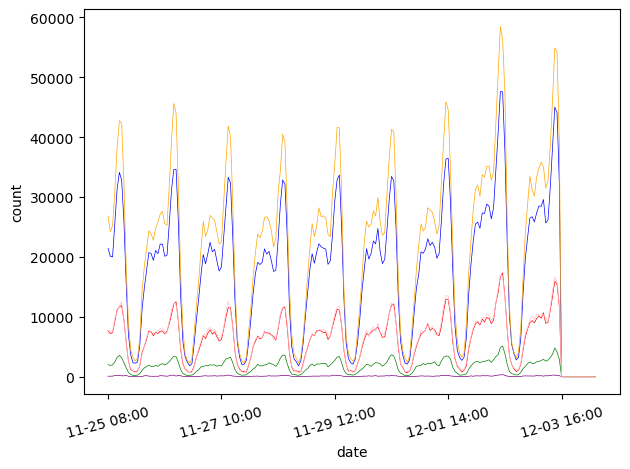

In [70]:
d = times = [datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%m-%d %H:%M') for timestamp in df.columns[1:-1]]

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel('count')

rand_ind = np.random.randint(0, timeseries.shape[0], 6)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0]], c='blue', lw=0.5)
ln2, = ax.plot(timeseries[rand_ind[1]], c='red', lw=0.5)
ln3, = ax.plot(timeseries[rand_ind[2]], c='green', lw=0.5)
ln4, = ax.plot(timeseries[rand_ind[3]], c='purple', lw=0.5)
ln5, = ax.plot(timeseries[rand_ind[4]], c='orange', lw=0.5)
ln6, = ax.plot(timeseries[rand_ind[5]], c='pink', lw=0.5)


# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return d[int(x)]
    except IndexError:
        return ''

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()